In [2]:
# для примера использую библиотеку neuralprophet
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
import os
import pickle
from tqdm.auto import tqdm
import datetime

In [3]:
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')

WARNING - (py.warnings._showwarnmsg) - /var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_89210/3499849097.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')



In [4]:
flights_1 = flights.merge(airports, how='right', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

In [5]:
flights_1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,EV,5103,N846AS,ABE,DTW,600,...,NaN,NaN,NaN,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,2015,1,1,4,EV,5579,N136EV,ABE,ATL,635,...,NaN,NaN,NaN,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
2,2015,1,1,4,EV,5267,N131EV,ABE,ATL,1600,...,NaN,NaN,NaN,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
3,2015,1,2,5,EV,5103,N849AS,ABE,DTW,600,...,NaN,NaN,NaN,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
4,2015,1,2,5,EV,6144,N15912,ABE,ORD,600,...,NaN,NaN,NaN,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332909,2015,12,31,4,OO,2992,N435SW,YUM,PHX,946,...,NaN,NaN,NaN,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
5332910,2015,12,31,4,OO,2991,N464SW,YUM,PHX,1130,...,NaN,NaN,NaN,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
5332911,2015,12,31,4,OO,2961,N869AS,YUM,PHX,1255,...,NaN,NaN,NaN,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597
5332912,2015,12,31,4,OO,2956,N821AS,YUM,PHX,1605,...,NaN,NaN,NaN,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [6]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
flights_1['Date'] = pd.to_datetime(flights_1[['YEAR','MONTH', 'DAY']])


In [23]:
flights_1['ARRIVAL_DELAY'] = flights_1['ARRIVAL_DELAY'].fillna(0).astype('int')


In [26]:
flights_1['PROBABILITY'] = np.where(flights_1['ARRIVAL_DELAY']>0, 0, 1)

In [34]:
A = pd.DataFrame()

In [36]:
A['COUNT'] = flights_1.groupby('Date')['Date'].count()
A['prob'] = flights_1.groupby('Date')['PROBABILITY'].mean()
A['COUNT'] = A['COUNT']/A['COUNT'].max()
A['WEATHER_DELAY'] = flights_1.groupby('Date')['WEATHER_DELAY'].sum()
A['WEATHER_DELAY'] = A['WEATHER_DELAY']/A['WEATHER_DELAY'].max()

<AxesSubplot:xlabel='Date'>

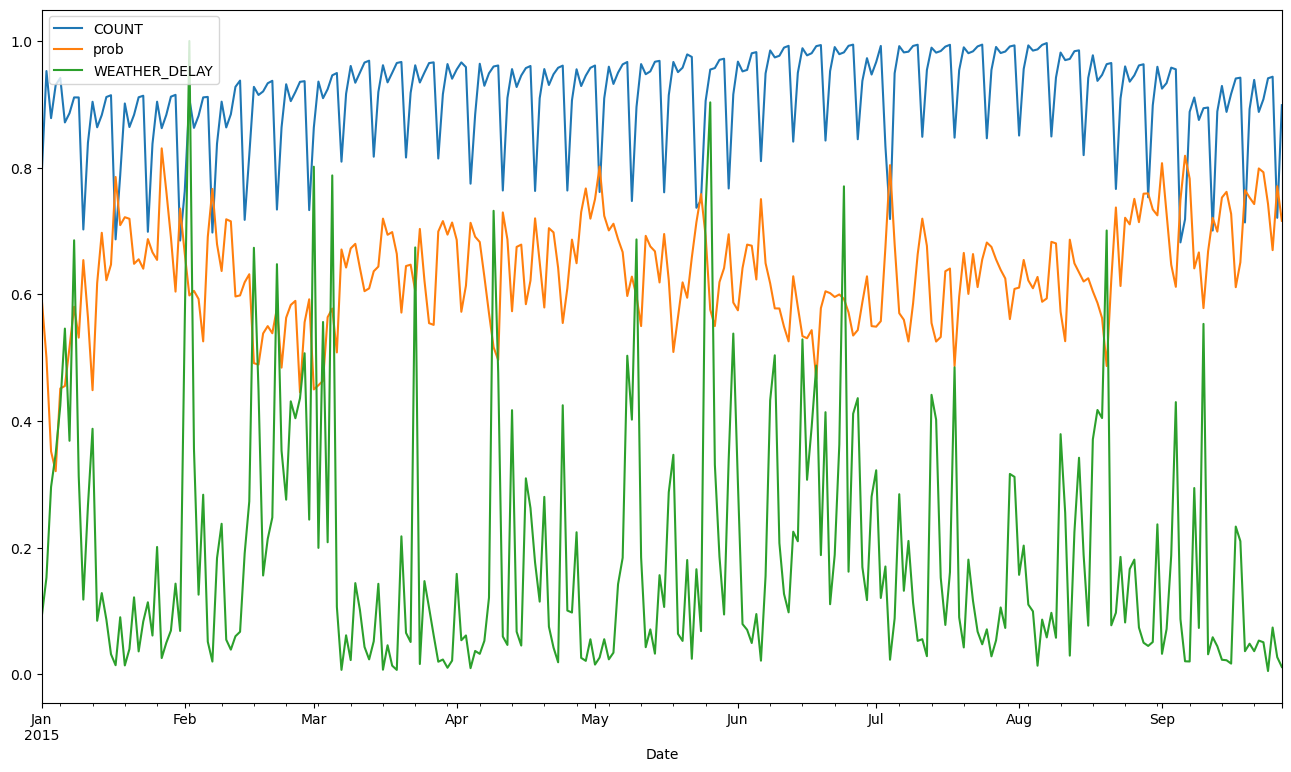

In [60]:
A[0:270].plot(figsize=[16,9])

In [63]:
flights_10.query("DESTINATION_AIRPORT == 'LGA'").groupby('AIRLINE')['Date'].count()

AIRLINE
DL    5298
F9     212
MQ    1085
WN    1639
Name: Date, dtype: int64

In [65]:
flights_10.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IATA_CODE', 'AIRPORT', 'CITY',
       'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'Date'],
      dtype='object')

In [107]:
o = flights_10.query("DESTINATION_AIRPORT == 'ORD'").reset_index()

In [108]:
o.head()

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Date,PROBABILITY
0,70925,2015,1,1,4,DL,2183,N904DL,ATL,ORD,...,NaN,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,2015-01-01,0
1,70967,2015,1,1,4,NK,762,N504NK,ATL,ORD,...,NaN,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,2015-01-01,1
2,71056,2015,1,1,4,DL,812,N937AT,ATL,ORD,...,NaN,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,2015-01-01,1
3,71071,2015,1,1,4,F9,1069,N227FR,ATL,ORD,...,0.0,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,2015-01-01,0
4,71156,2015,1,1,4,MQ,2813,N543MQ,ATL,ORD,...,NaN,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694,2015-01-01,0


In [76]:
s = flights_10.groupby('Date')['Date'].count()

<AxesSubplot:xlabel='Date'>

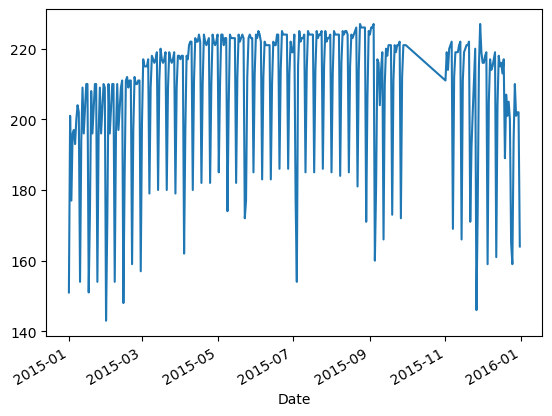

In [81]:
s.plot()

In [78]:
flights_10['PROBABILITY'] = np.where(flights_10['DEPARTURE_DELAY']>0, 0, 1)


WARNING - (py.warnings._showwarnmsg) - /var/folders/m9/x7jxk9jx2g9ch4ngnwz3n8wh0000gn/T/ipykernel_71783/2758573045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_10['PROBABILITY'] = np.where(flights_10['DEPARTURE_DELAY']>0, 0, 1)



In [82]:
a = flights_10.groupby('Date')['PROBABILITY'].mean()

In [83]:
df = pd.merge(s,a, right_index=True, left_index=True)

<AxesSubplot:xlabel='Date'>

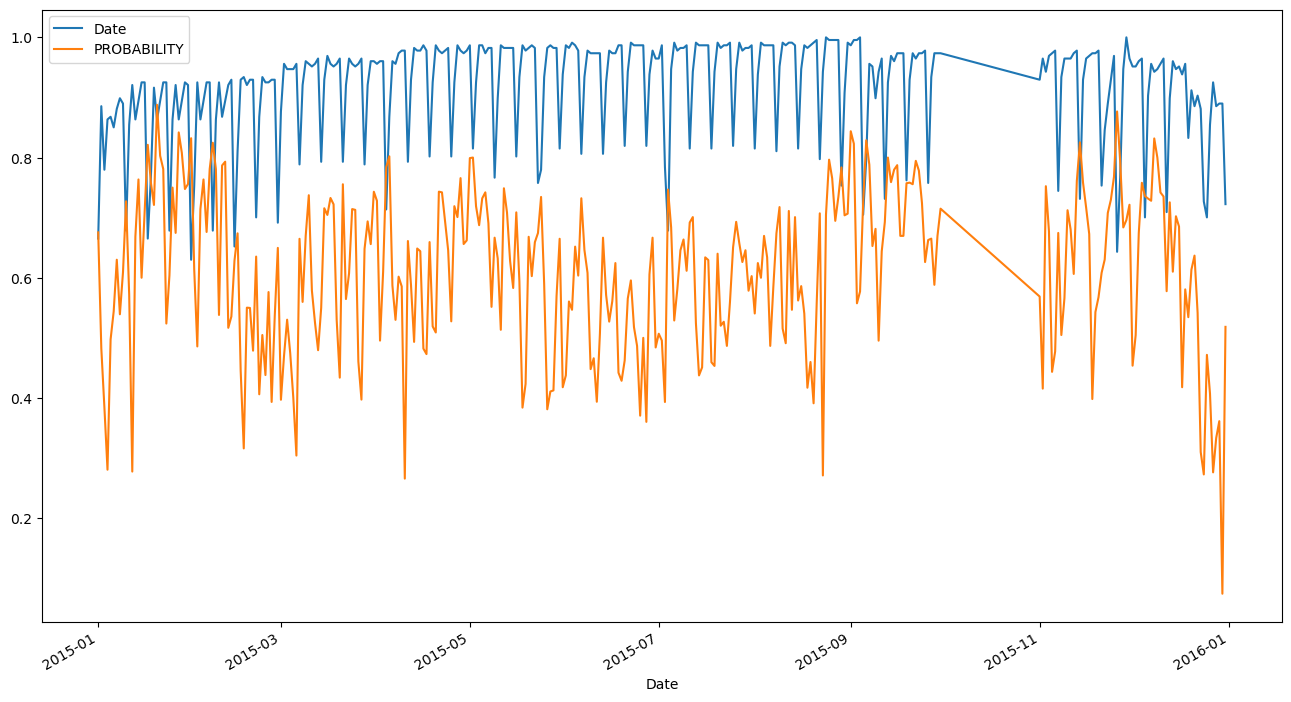

In [92]:
df.plot(figsize=[16,9])

In [88]:
df.Date.max()

227

In [89]:
df['Date'] = df['Date']/df.Date.max()

<AxesSubplot:xlabel='Date'>

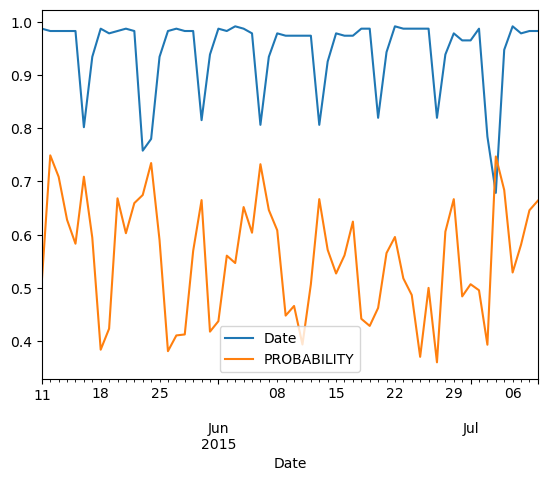

In [111]:
df[130:190].plot()

In [347]:
df1 = df.drop('Date', axis=1)

In [348]:
df1.reset_index(inplace=True)

In [349]:
df1.columns = ['ds', 'y']

In [350]:
df1 = df1[0:210]

In [322]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      334 non-null    datetime64[ns]
 1   y       334 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [181]:
df1.dropna()

,ds,y
0,2015-01-01,0.675497
1,2015-01-02,0.482587
2,2015-01-03,0.384181
3,2015-01-04,0.280612
4,2015-01-05,0.497462
...,...,...
175,2015-06-25,0.370536
176,2015-06-26,0.500000
177,2015-06-27,0.360215
178,2015-06-28,0.605634


<AxesSubplot:>

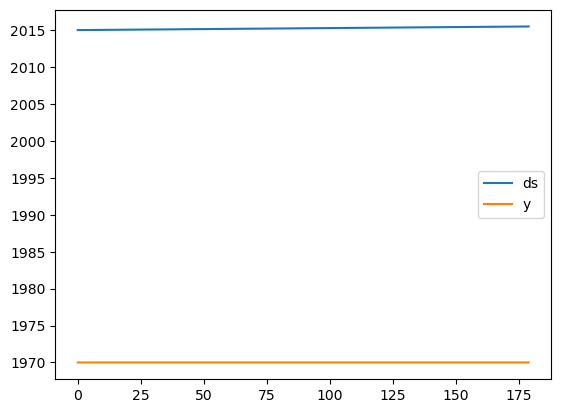

In [182]:
df1.plot()

In [351]:
m = NeuralProphet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
m = m.add_country_holidays("US")
m.fit(df1,freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 357
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additive_events_dims = additive_events_dims.append(

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.11E-01, min: 2.39E+00


  0%|          | 0/112 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.71E-02, min: 2.54E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.06E-01
Epoch[357/357]: 100%|██████████| 357/357 [00:06<00:00, 52.01it/s, SmoothL1Loss=0.0164, MAE=0.0764, RMSE=0.0946, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.457492,0.451422,0.526882,0.0
1,0.443570,0.442727,0.517308,0.0
2,0.429761,0.434370,0.503861,0.0
3,0.415532,0.425634,0.498085,0.0
4,0.398485,0.415295,0.484169,0.0
...,...,...,...,...
352,0.016361,0.076359,0.093717,0.0
353,0.016359,0.076354,0.093784,0.0
354,0.016359,0.076353,0.094310,0.0
355,0.016358,0.076353,0.094067,0.0


In [356]:
future = m.make_future_dataframe(df1, periods=60)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.524% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [357]:
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



In [298]:
metrix = m.fit(df1, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 393
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additive_events_dims = additive_events_dims.append(

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.28E-02, min: 8.45E+00


  0%|          | 0/110 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.28E-02, min: 5.77E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.10E-02
Epoch[393/393]: 100%|██████████| 393/393 [00:05<00:00, 65.52it/s, SmoothL1Loss=0.0178, MAE=0.0809, RMSE=0.1, RegLoss=0]


In [330]:
forecast  = m.predict (df1)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.401% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.401% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [354]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly,events_additive,event_Christmas Day,event_Columbus Day,event_Independence Day,event_Independence Day (Observed),event_Labor Day,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_Thanksgiving,event_Veterans Day,event_Washington's Birthday
0,2015-07-30,None,0.573681,NaN,0.614980,-0.041299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-07-31,None,0.576178,NaN,0.617619,-0.041441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-08-01,None,0.671857,NaN,0.620257,0.051600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-08-02,None,0.650298,NaN,0.622896,0.027402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-08-03,None,0.601575,NaN,0.625535,-0.023960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015-08-04,None,0.632801,NaN,0.628173,0.004628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015-08-05,None,0.653882,NaN,0.630812,0.023070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2015-08-06,None,0.592151,NaN,0.633451,-0.041299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015-08-07,None,0.594649,NaN,0.636089,-0.041441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015-08-08,None,0.690328,NaN,0.638728,0.051600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
metrix = m.make_future_dataframe(df1, periods=30)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [299]:
df2 = m.make_future_dataframe(df1, periods=60)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 3.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)



In [300]:
forecast = m.predict(df2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/total_project/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



<AxesSubplot:xlabel='ds'>

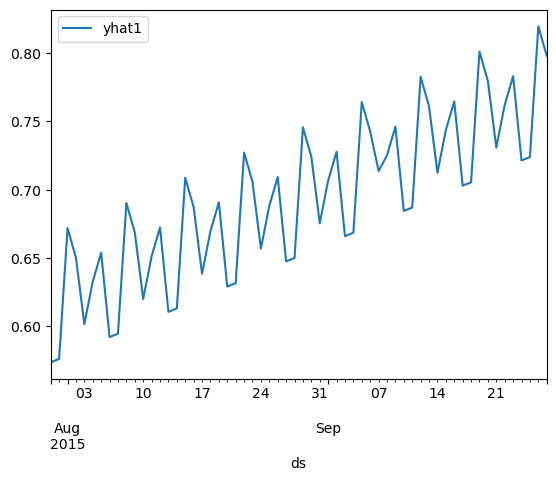

In [358]:
forecast.plot(x='ds', y='yhat1')

In [244]:
forecast.to_excel('1.xlsx')

In [232]:
metrix

,ds,y
0,2015-05-31,0.417840
1,2015-06-01,0.437500
2,2015-06-02,0.560538
3,2015-06-03,0.546667
4,2015-06-04,0.651786
5,2015-06-05,0.603604
6,2015-06-06,0.732240
7,2015-06-07,0.646226
8,2015-06-08,0.608108
9,2015-06-09,0.447964


In [332]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly,events_additive,event_Christmas Day,event_Columbus Day,event_Independence Day,event_Independence Day (Observed),event_Labor Day,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_Thanksgiving,event_Veterans Day,event_Washington's Birthday
0,2015-01-01,0.675497,0.675541,0.000044,0.504170,-0.103256,0.215761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215761,0.0,0.0,0.0
1,2015-01-02,0.482587,0.498657,0.016070,0.512505,-0.031598,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2015-01-03,0.384181,0.554290,0.170109,0.520840,0.074900,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2015-01-04,0.280612,0.540228,0.259616,0.529175,0.024296,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,2015-01-05,0.497462,0.520836,0.023374,0.537510,-0.035995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2015-12-27,0.276190,0.527671,0.251481,0.516916,0.024296,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
330,2015-12-28,0.333333,0.497883,0.164549,0.513700,-0.035995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
331,2015-12-29,0.361386,0.528552,0.167165,0.510485,0.041417,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
332,2015-12-30,0.074257,0.520361,0.446104,0.507269,0.030236,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
